In [1]:
%matplotlib inline

import tweepy as tw
import json
import pandas as pd
import numpy as np

from collections import defaultdict, Counter
import os
from IPython.display import clear_output

import networkx as nx


import matplotlib.pyplot as plt
import seaborn as sns

from io import StringIO
from pydotplus import graph_from_dot_data
import matplotlib.image as mpimg

In [2]:
sns.set_context("poster")
sns.set_style("ticks")

In [3]:
DATA_DIR="../data"
TWITTER_CONFIG_FILE=os.path.join(DATA_DIR, "twitter_config.json")

## Twitter Access Tokens

If you are proceeding further then you are expected to have created your Twitter application by following the steps from [Twitter App Creation](https://dev.twitter.com/oauth/overview/application-owner-access-tokens) page. 

Make sure you have the following details of your Twitter application readily available:
* 'access_token'
* 'access_token_secret'
* 'consumer_key'
* 'consumer_secret'

Please enter the value of each of the items as shown in your Twitter application, when prompted by the code below.


In [4]:
if not os.path.isfile(TWITTER_CONFIG_FILE):
    with open(os.path.join(DATA_DIR, "twitter_config.sample.json")) as fp:
        creds = json.load(fp)
        for k in sorted(creds.keys()):
            v = input("Enter %s:\t" % k)
            creds[k] = v
    print(creds)
    with open(TWITTER_CONFIG_FILE, "w+") as fp:
        json.dump(creds, fp, indent=4, sort_keys=True)
    clear_output()
    print("Printed credentials to file %s" % TWITTER_CONFIG_FILE)

In [5]:
with open(TWITTER_CONFIG_FILE) as fp:
    creds = json.load(fp)
print(creds.keys())

dict_keys(['consumer_key', 'consumer_secret', 'access_token', 'access_token_secret'])


In [6]:
auth = tw.OAuthHandler(creds["consumer_key"], creds["consumer_secret"])
auth.set_access_token(creds["access_token"], creds["access_token_secret"])
api = tw.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True,
             retry_count=5, retry_delay=100, 
            )

print("Tweepy ready for search")

Tweepy ready for search


In [7]:
statuses = api.search(q=input("What is your search term?"), count=100)

What is your search term?winter olympics


In [8]:
len(statuses)

100

In [9]:
for status in statuses:
    print(status.text)

RT @SportsCenter: SHAUN WHITE TAKES GOLD!

His medal earns USA its 100th Winter Olympics gold medal in history. https://t.co/QMR2nOiNl4
RT @NBCOlympics: SHAUN WHITE IS NOT HUMAN. #BestOfUS #WinterOlympics https://t.co/r5PfUbeROr https://t.co/6MmQiSZGRh
RT @SportsCenter: SHAUN WHITE TAKES GOLD!

His medal earns USA its 100th Winter Olympics gold medal in history. https://t.co/QMR2nOiNl4
RT @NBCOlympics: SHAUN WHITE IS NOT HUMAN. #BestOfUS #WinterOlympics https://t.co/r5PfUbeROr https://t.co/6MmQiSZGRh
RT @SportsCenter: SHAUN WHITE TAKES GOLD!

His medal earns USA its 100th Winter Olympics gold medal in history. https://t.co/QMR2nOiNl4
RT @SportsCenter: SHAUN WHITE TAKES GOLD!

His medal earns USA its 100th Winter Olympics gold medal in history. https://t.co/QMR2nOiNl4
RT @NBCOlympics: SHAUN WHITE IS NOT HUMAN. #BestOfUS #WinterOlympics https://t.co/r5PfUbeROr https://t.co/6MmQiSZGRh
RT @cnnbrk: Team USA's Shaun White wins the gold medal despite falling in the men's snowboard halfpipe at

In [10]:
def dict2df(data):
    return pd.DataFrame(
        list(data.items()),
        columns=["item", "counts"]
    ).sort_values("counts", ascending=False)

def get_entities(statuses):
    hashtags = defaultdict(int)
    mentions = defaultdict(int)
    keys = ("hashtags", "user_mentions")
    for s in statuses:
        entities = s.entities
        if "hashtags" in entities:
            e = map(lambda x: x["text"], entities["hashtags"])
            for t in e:
                hashtags[t] += 1
        if "user_mentions" in entities:
            e = map(lambda x: x["screen_name"], entities["user_mentions"])
            for t in e:
                mentions[t] += 1
    return dict2df(hashtags), dict2df(mentions)

In [11]:
hashtags, mentions = get_entities(statuses)

In [12]:
len(statuses)

100

In [13]:
hashtags

,item,counts
1,WinterOlympics,26
0,BestOfUS,25
6,Olympics,3
4,PyeongChang2018,2
2,Vegan,1
3,GoldMedal,1
5,olympics,1


In [14]:
mentions

,item,counts
0,SportsCenter,29
1,NBCOlympics,25
4,NBCNews,6
10,damnjavi,5
7,shaunwhite,4
2,cnnbrk,3
21,MEL2AUSA,3
5,taeyongpictures,3
19,ESPNStatsInfo,2
16,ComplexSports,2


## Current user's information

In [15]:
current_user = api.me()
current_user

User(_api=<tweepy.api.API object at 0x000001CDAA5D9160>, _json={'id': 16621479, 'id_str': '16621479', 'name': 'Shubhanshu Mishra', 'screen_name': 'TheShubhanshu', 'location': 'Urbana, Illinois, USA', 'profile_location': None, 'description': 'PhD Student at @GSLIS @UIUC using data mining and ML. All my tweets can be used for data mining. I created ReadLater for Chrome https://t.co/rDKLiPfswZ', 'url': 'https://t.co/WfIGt6oMtT', 'entities': {'url': {'urls': [{'url': 'https://t.co/WfIGt6oMtT', 'expanded_url': 'http://shubhanshu.com', 'display_url': 'shubhanshu.com', 'indices': [0, 23]}]}, 'description': {'urls': [{'url': 'https://t.co/rDKLiPfswZ', 'expanded_url': 'http://goo.gl/AxnrBG', 'display_url': 'goo.gl/AxnrBG', 'indices': [128, 151]}]}}, 'protected': False, 'followers_count': 727, 'friends_count': 872, 'listed_count': 76, 'created_at': 'Mon Oct 06 22:27:27 +0000 2008', 'favourites_count': 260, 'utc_offset': -21600, 'time_zone': 'Central America', 'geo_enabled': True, 'verified': Fal

In [16]:
status

Status(_api=<tweepy.api.API object at 0x000001CDAA5D9160>, _json={'created_at': 'Wed Feb 14 03:20:24 +0000 2018', 'id': 963613872275034112, 'id_str': '963613872275034112', 'text': 'RT @MEL2AUSA: Shaun White wins US its 100th Winter Olympics gold with epic halfpipe performance!!! #Olympics https://t.co/q5E25PQi4i', 'truncated': False, 'entities': {'hashtags': [{'text': 'Olympics', 'indices': [99, 108]}], 'symbols': [], 'user_mentions': [{'screen_name': 'MEL2AUSA', 'name': 'MAGA MEL 🇺🇸', 'id': 3405962098, 'id_str': '3405962098', 'indices': [3, 12]}], 'urls': [{'url': 'https://t.co/q5E25PQi4i', 'expanded_url': 'http://www.foxnews.com/sports/2018/02/13/shaun-white-wins-us-its-100th-winter-olympics-gold-with-epic-halfpipe-performance.html', 'display_url': 'foxnews.com/sports/2018/02…', 'indices': [109, 132]}]}, 'metadata': {'iso_language_code': 'en', 'result_type': 'recent'}, 'source': '<a href="http://twitter.com/download/android" rel="nofollow">Twitter for Android</a>', 'in_reply_to_statu

In [17]:
print(
"""Username: {}
Full Name: {}
# Followers: {}
# Friends: {}
# Statuses: {}""".format(
        current_user.screen_name,
        current_user.name,
        current_user.followers_count,
        current_user.friends_count,
        current_user.statuses_count
    )
)

Username: TheShubhanshu
Full Name: Shubhanshu Mishra
# Followers: 727
# Friends: 872
# Statuses: 4242


## Friends API

In [18]:
friends = []
for friend in tw.Cursor(api.friends, count=100).items():
    friends.append(friend)
print("{} friends found for {}".format(len(friends), current_user.name))

Rate limit reached. Sleeping for: 551
872 friends found for Shubhanshu Mishra


In [19]:
df_friends = pd.DataFrame(
    list(map(
        lambda k: (k.id, k.name, k.friends_count, k.followers_count, k.statuses_count),
        friends
    )), columns=["id", "name", "friends", "followers", "statuses"]
).sort_values("followers", ascending=False).reset_index(drop=True)
df_friends.head(15)

,id,name,friends,followers,statuses
0,813286,Barack Obama,624792,99895266,15492
1,50393960,Bill Gates,183,44124243,2588
2,71201743,Virat Kohli,51,22906032,1427
3,88856792,Aamir Khan,9,22825283,520
4,20536157,Google,213,20004564,80723
5,44196397,Elon Musk,47,19499145,3878
6,1536791610,President Obama,79,15205386,352
7,19725644,Neil deGrasse Tyson,43,11640079,5706
8,15492359,TED Talks,549,10963875,26114
9,204832963,God,1,4434566,10254


In [20]:
network = np.zeros([df_friends.shape[0], df_friends.shape[0]])
network.shape

(872, 872)

In [21]:
def get_friendship(id1, id2, verbose=False):
    response = api.show_friendship(source_id=id1, target_id=id2)
    if verbose:
        print(response)
    return response[0].following, response[1].following
    

In [22]:
get_friendship(df_friends["id"].values[0], df_friends["id"].values[1], verbose=True)

(Friendship(_api=<tweepy.api.API object at 0x000001CDAA5D9160>, id=813286, id_str='813286', screen_name='BarackObama', following=False, followed_by=True, live_following=False, following_received=None, following_requested=None, notifications_enabled=None, can_dm=True, blocking=None, blocked_by=None, muting=None, want_retweets=None, all_replies=None, marked_spam=None), Friendship(_api=<tweepy.api.API object at 0x000001CDAA5D9160>, id=50393960, id_str='50393960', screen_name='BillGates', following=True, followed_by=False, following_received=None, following_requested=None))


(False, True)

In [23]:
network[0, 0] = False
network[1, 0] = True
network[0:3, 0]

array([0., 1., 0.])

In [24]:
def generate_ego_network(df_friends):
    network = np.zeros([df_friends.shape[0], df_friends.shape[0]])
    processed_friendships=0
    for i, fid1 in enumerate(df_friends["id"].values):
        for j, fid2 in enumerate(df_friends["id"].values[i+1:], start=i+1):
            try:
                tie_labels = get_friendship(fid1, fid2)
                processed_friendships += 1
            except:
                print("Processed friendships = {}".format(processed_friendships))
                print("Error occurred")
                return network
            network[i, j] = tie_labels[0]
            network[j, i] = tie_labels[1]
    return network

In [25]:
df_friends.tail()

,id,name,friends,followers,statuses
867,709866998604419072,ICSS2016,0,17,28
868,217524967,Shubhanshu Mishra,3,12,382
869,920666302112464896,Shivangi Prasad,14,3,0
870,4330080442,Sudhanshu Mishra,21,2,0
871,492698838,LiveLifeLikeAJive,9,1,0


## Generate user mention network

In [26]:
statuses = [status for status in tw.Cursor(
    api.search, q=input("What is your search term?"), count=100).items(100)]

What is your search term?deep learning


In [27]:
len(statuses)

100

In [28]:
status = next(filter(lambda x: len(x.entities["hashtags"]), statuses))

In [29]:
status.entities

{'hashtags': [{'indices': [102, 105], 'text': 'AI'},
  {'indices': [106, 122], 'text': 'MachineLearning'},
  {'indices': [123, 136], 'text': 'DeepLearning'}],
 'symbols': [],
 'urls': [],
 'user_mentions': [{'id': 841437061,
   'id_str': '841437061',
   'indices': [3, 16],
   'name': 'AI',
   'screen_name': 'DeepLearn007'},
  {'id': 32904892,
   'id_str': '32904892',
   'indices': [94, 101],
   'name': 'GumGum',
   'screen_name': 'GumGum'}]}

In [30]:
def get_entities(statuses, entity_type, text_property):
    entity_counts = defaultdict(int)
    entity_network = defaultdict(int)
    for status in statuses:
        for i, entity in enumerate(status.entities[entity_type]):
            entity_counts[entity[text_property].lower()] += 1
            for j, entity_2 in enumerate(status.entities[entity_type][i+1:], start=i+1):
                entity_network[(
                    entity[text_property].lower(),
                    entity_2[text_property].lower()
                )] += 1
    return entity_counts, entity_network

In [31]:
entity_type="user_mentions"
text_property="screen_name"
entity_counts, entity_network = get_entities(statuses, entity_type, text_property)

In [32]:
df_entities = pd.DataFrame(list(entity_counts.items()),
                           columns=["entity", "counts"]).sort_values(
    "counts", ascending=False
).reset_index(drop=True)
df_entities.head()

,entity,counts
0,deeplearn007,18
1,sajidmirza,9
2,datasciencectrl,5
3,kirkdborne,4
4,ronald_vanloon,4


In [33]:
df_entities.head(20)

,entity,counts
0,deeplearn007,18
1,sajidmirza,9
2,datasciencectrl,5
3,kirkdborne,4
4,ronald_vanloon,4
5,hiho_karuta,4
6,andrewlbeam,4
7,equity_ddsb,3
8,productivesys,3
9,gumgum,3


In [34]:
df_entity_pairs = pd.DataFrame([(k1, k2, v) for (k1,k2), v in entity_network.items()],
                           columns=[
                               "{}_1".format(entity_type),
                               "{}_2".format(entity_type),
                               "counts"]).sort_values(
    "counts", ascending=False
).reset_index(drop=True)
df_entity_pairs.head()

,user_mentions_1,user_mentions_2,counts
0,ronald_vanloon,datasciencectrl,4
1,ronald_vanloon,williamvorhies,3
2,williamvorhies,datasciencectrl,3
3,deeplearn007,gumgum,3
4,johnhall,forbes,2


In [35]:
df_entity_pairs.head(20)

,user_mentions_1,user_mentions_2,counts
0,ronald_vanloon,datasciencectrl,4
1,ronald_vanloon,williamvorhies,3
2,williamvorhies,datasciencectrl,3
3,deeplearn007,gumgum,3
4,johnhall,forbes,2
5,ddsbleadership,equity_ddsb,2
6,tylerpaolo,andrewlbeam,2
7,hankmullaney,nhmommy1,1
8,matthew____p,therealjonadams,1
9,matthew____p,scottadamssays,1


## Plot network

In [36]:
G = nx.Graph()

In [37]:
entity_counts

defaultdict(int,
            {'365surmariusz': 1,
             '_farooqumar': 1,
             'andrewlbeam': 4,
             'andrewyng': 1,
             'basmanbob': 1,
             'brynmw': 1,
             'ceejbot': 1,
             'clareai_chatbot': 1,
             'coursera': 1,
             'datasciencectrl': 5,
             'ddsbleadership': 2,
             'deeplearn007': 18,
             'dprasanthnair': 1,
             'dynamicwebpaige': 1,
             'equity_ddsb': 3,
             'forbes': 2,
             'gamerlearner': 1,
             'geoworldmedia': 1,
             'granvilledsc': 1,
             'gumgum': 3,
             'hankmullaney': 1,
             'hiho_karuta': 4,
             'iamjkeating': 1,
             'intelai': 1,
             'jason_pontin': 1,
             'java': 1,
             'johnhall': 2,
             'jskielb3': 1,
             'kgriffor': 1,
             'kirkdborne': 4,
             'l_xagas': 1,
             'madrogran': 1,
             'mat

In [38]:
G.add_nodes_from(entity_counts)

In [39]:
G.add_edges_from([
    (k[0], k[1], {"weight": v})
    for k, v in entity_network.items()
])

(-1.0455662353682387,
 1.0539559469778776,
 -1.099767924807054,
 1.0951264209481315)

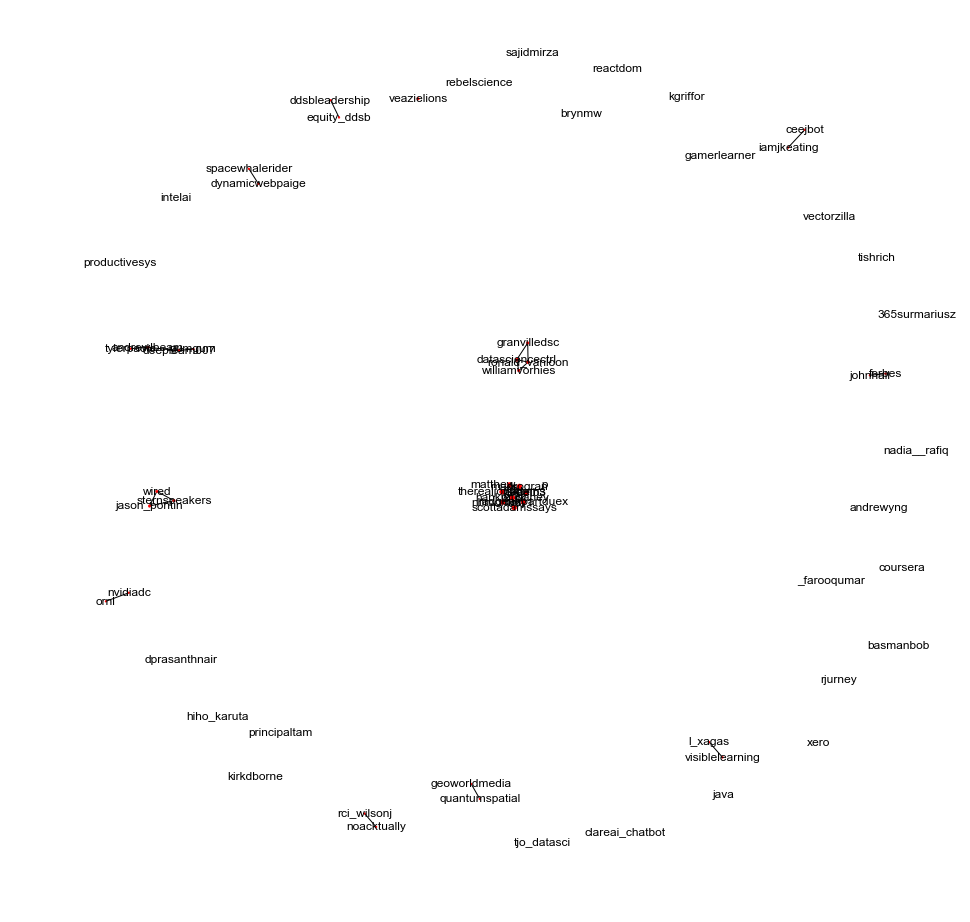

In [40]:
fig, ax = plt.subplots(1,1, figsize=(16, 16))
nx.draw_networkx(
    G, with_labels=True,
    node_size=[x[1]*3 for x in G.degree()],
    pos=nx.spring_layout(G),
    ax=ax
)
ax.axis("off")

In [41]:
connected_components = sorted(nx.connected_component_subgraphs(G), key = len, reverse=True)
print("{} connected components found.".format(len(connected_components)))

38 connected components found.


(-1.0362026620494467,
 1.1383559901392812,
 -1.1145056964776854,
 1.1436730053104942)

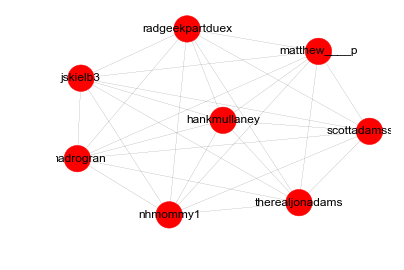

In [42]:
fig, ax = plt.subplots(1,1)
nx.draw_networkx(
    connected_components[0], with_labels=True,
    node_size=[x[1]*100 for x in connected_components[0].degree()],
    pos=nx.spring_layout(connected_components[0]),
    width=0.1,
    ax=ax
)
ax.axis("off")

In [43]:
d = G.degree()

In [44]:
for i, k in enumerate(d):
    print(k)
    if i > 10:
        break

('gamerlearner', 0)
('deeplearn007', 2)
('gumgum', 1)
('ddsbleadership', 1)
('equity_ddsb', 1)
('rjurney', 0)
('quantumspatial', 1)
('geoworldmedia', 1)
('noacktually', 1)
('rci_wilsonj', 1)
('kirkdborne', 0)
('365surmariusz', 0)


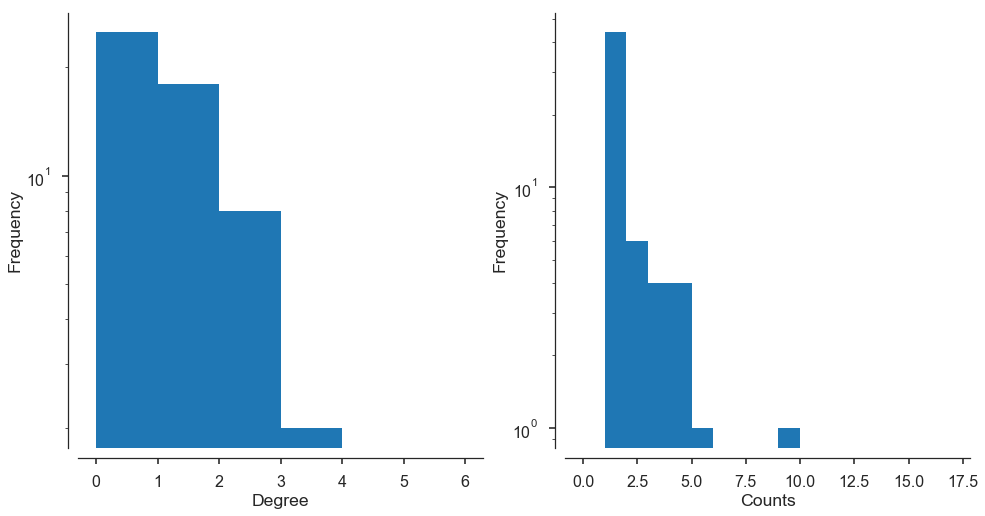

In [45]:
fig, ax = plt.subplots(1,2, figsize=(16,8))
degree_values = [v for k,v in G.degree()]
ax[0].hist(list(degree_values), bins=list(range(max(degree_values))), log=True)
ax[0].set_xlabel("Degree")
ax[0].set_ylabel("Frequency")

ax[1].hist(list(entity_counts.values()), bins=list(range(max(entity_counts.values()))), log=True)
ax[1].set_xlabel("Counts")
ax[1].set_ylabel("Frequency")
sns.despine(offset=10)

### Why are the graphs different?
Concept of weights

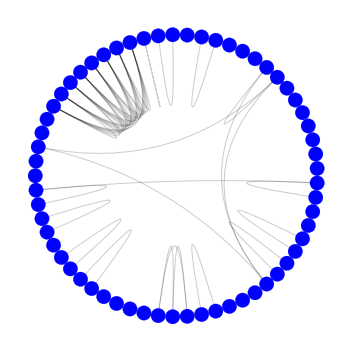

In [46]:
from nxviz.plots import CircosPlot

# Assume we have a professional network of physicians belonging
# to hospitals.
c = CircosPlot(G)
c.draw()

plt.show()  # only needed in scripts